<a href="https://colab.research.google.com/github/anaPierrout/TCC/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import csv
from collections import defaultdict
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import odeint
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [15]:
caminho_arquivo = '/content/VRA_2022_01.csv'

df = pd.read_csv(caminho_arquivo, sep= "\t")

df.head()

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,Descrição Aeroporto Origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,Descrição Aeroporto Destino,Chegada Prevista,Chegada Real,Situação Voo,Justificativa,Referência,Situação Partida,Situação Chegada
0,AAL,"AMERICAN AIRLINES, INC.",904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/01/2022 00:05,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 08:50,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
1,AAL,"AMERICAN AIRLINES, INC.",905,0,I,B788,295,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 22:00,NaN,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/01/2022 06:20,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
2,AAL,"AMERICAN AIRLINES, INC.",906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 00:05,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 08:40,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
3,AAL,"AMERICAN AIRLINES, INC.",929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 22:00,NaN,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/01/2022 06:20,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",930,0,I,B788,295,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 22:30,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2022 06:55,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN


In [16]:
df.rename(columns={'Descrição Aeroporto Origem': 'origem'}, inplace=True)
df.rename(columns={'Descrição Aeroporto Destino': 'destino'}, inplace=True)
df.rename(columns={'Situação Voo': 'situacao'}, inplace=True)
df.head()

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,destino,Chegada Prevista,Chegada Real,situacao,Justificativa,Referência,Situação Partida,Situação Chegada
0,AAL,"AMERICAN AIRLINES, INC.",904,0,I,B788,295,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,01/01/2022 00:05,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 08:50,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
1,AAL,"AMERICAN AIRLINES, INC.",905,0,I,B788,295,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 22:00,NaN,SBGL,AEROPORTO INTERNACIONAL DO RIO DE JANEIRO (GAL...,02/01/2022 06:20,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
2,AAL,"AMERICAN AIRLINES, INC.",906,0,I,B77W,318,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 00:05,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 08:40,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
3,AAL,"AMERICAN AIRLINES, INC.",929,0,I,B77W,318,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",01/01/2022 22:00,NaN,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/01/2022 06:20,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN
4,AAL,"AMERICAN AIRLINES, INC.",930,0,I,B788,295,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 22:30,NaN,KMIA,"MIAMI INTERNATIONAL AIRPORT - MIAMI, FLORIDA -...",02/01/2022 06:55,NaN,CANCELADO,NaN,2022-01-01,NaN,NaN


In [17]:
df = df[df['situacao'] != 'CANCELADO']
df.head()

,Sigla ICAO Empresa Aérea,Empresa Aérea,Número Voo,Código DI,Código Tipo Linha,Modelo Equipamento,Número de Assentos,Sigla ICAO Aeroporto Origem,origem,Partida Prevista,Partida Real,Sigla ICAO Aeroporto Destino,destino,Chegada Prevista,Chegada Real,situacao,Justificativa,Referência,Situação Partida,Situação Chegada
391,ACA,AIR CANADA,90,0,X,B773,450,CYYZ,TORONTO PEARSON INTERNATIONAL AIRPORT - TORONT...,01/01/2022 00:50,01/01/2022 01:32,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 10:50,01/01/2022 10:51,REALIZADO,NaN,2022-01-01,Atraso 30-60,Pontual
392,ACA,AIR CANADA,91,0,X,B773,450,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 20:45,01/01/2022 21:04,CYYZ,TORONTO PEARSON INTERNATIONAL AIRPORT - TORONT...,02/01/2022 06:45,02/01/2022 07:07,REALIZADO,NaN,2022-01-01,Pontual,Pontual
393,ACA,AIR CANADA,97,0,X,B789,300,SAEZ,MINISTRO PISTARINI INTERNATIONAL AIRPORT (EZEI...,01/01/2022 16:45,01/01/2022 17:34,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 19:45,01/01/2022 20:13,REALIZADO,NaN,2022-01-01,Atraso 30-60,Pontual
394,ACA,AIR CANADA,97,0,X,B789,300,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,01/01/2022 22:00,01/01/2022 22:10,CYUL,MONTRÉAL-PIERRE ELLIOTT TRUDEAU INTERNATIONAL ...,02/01/2022 08:00,02/01/2022 08:24,REALIZADO,NaN,2022-01-01,Pontual,Pontual
395,ACA,AIR CANADA,90,0,X,B773,450,CYYZ,TORONTO PEARSON INTERNATIONAL AIRPORT - TORONT...,02/01/2022 00:50,02/01/2022 04:59,SBGR,GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...,02/01/2022 10:50,02/01/2022 14:59,REALIZADO,NaN,2022-01-02,Atraso >240,Atraso >240


In [18]:
total_assentos = df['Número de Assentos'].sum()



> O código percorre um DataFrame para contar rotas entre aeroportos, cria uma matriz de adjacência para representar essas rotas e utiliza a biblioteca NetworkX para construir e visualizar um grafo, onde os nós representam aeroportos e as arestas representam as rotas entre eles, ponderadas pelo número de ocorrências de cada rota.





In [19]:
rotas = defaultdict(int)

for index, row in df.iterrows():
    origem = row['origem']
    destino = row['destino']
    rotas[(origem, destino)] += 1

In [20]:
aeroportos = sorted(set().union(*[set(rota) for rota in rotas.keys()]))

In [21]:
matriz_adjacencia = np.zeros((len(aeroportos), len(aeroportos)), dtype=int)
for i, origem in enumerate(aeroportos):
    for j, destino in enumerate(aeroportos):
        matriz_adjacencia[i, j] = rotas.get((origem, destino), 0)

print("Matriz de Adjacência:")
df_matriz = pd.DataFrame(matriz_adjacencia, index=aeroportos, columns=aeroportos)
print(df_matriz)

Matriz de Adjacência:
                                                    ADALBERTO MENDES DA SILVA - CASCAVEL - PR - BRASIL  \
ADALBERTO MENDES DA SILVA - CASCAVEL - PR - BRASIL                                                  0    
ADOLFO SUÁREZ MADRID-BARAJAS AIRPORT - MADRID -...                                                  0    
AERODROMO DE PARAGOMINAS - PARAGOMINAS - PA - B...                                                  0    
AEROPORTO DE ARACATI - ARACATI - CE - BRASIL                                                        0    
AEROPORTO ESTADUAL DE JUNDIAÍ - JUNDIAÍ - SP - ...                                                  0    
...                                                                                               ...    
WASHINGTON DULLES INTERNATIONAL AIRPORT - WASHI...                                                  0    
YUMA INTERNATIONAL AIRPORT/MARINE CORPS AIR STA...                                                  0    
ZUMBI DOS PALMARES - RIO

In [22]:
G = nx.Graph()

for aeroporto in aeroportos:
    G.add_node(aeroporto)

In [23]:
for (origem, destino), contagem in rotas.items():
    G.add_edge(origem, destino, weight=contagem)

pos = nx.random_layout(G)

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:312: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


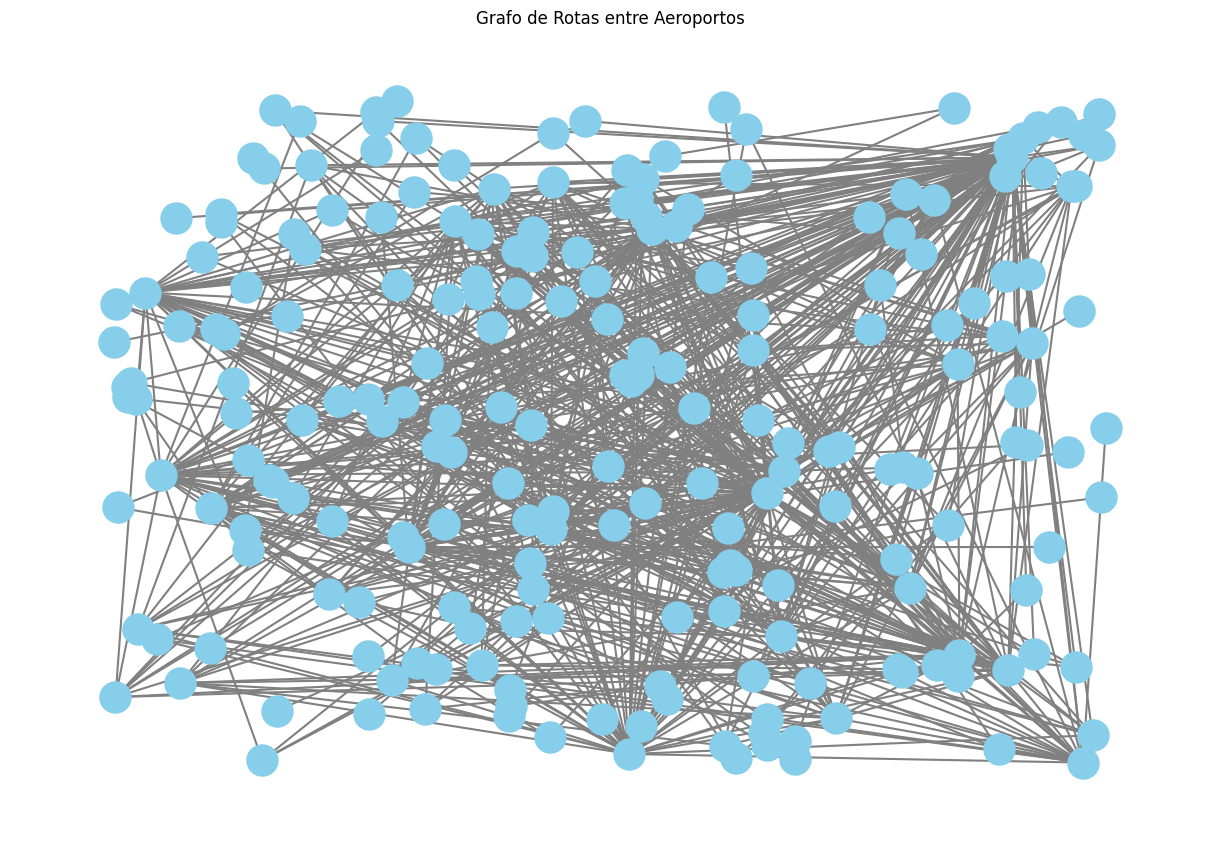

In [24]:
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', font_size=10, edge_color='gray', width=1.5, arrowsize=20)
plt.title('Grafo de Rotas entre Aeroportos')
plt.show()



> Criação e visualização de um subgrafo dos cinco primeiros aeroportos do grafo original, destacando as rotas entre eles. Cada aresta no subgrafo possui um rótulo que indica o número de voos (ou a contagem de rotas) entre os aeroportos conectados. A idéia é facilitar a compreensão das conexões e a densidade das rotas entre os primeiros cinco aeroportos.




In [25]:
GP = nx.Graph()
for (origem, destino), contagem in rotas.items():
    GP.add_edge(origem, destino, weight=contagem, label=contagem)

In [26]:
cinco_nos = list(GP.nodes())[:5]

subgrafo = GP.subgraph(cinco_nos)

pos = nx.random_layout(subgrafo)

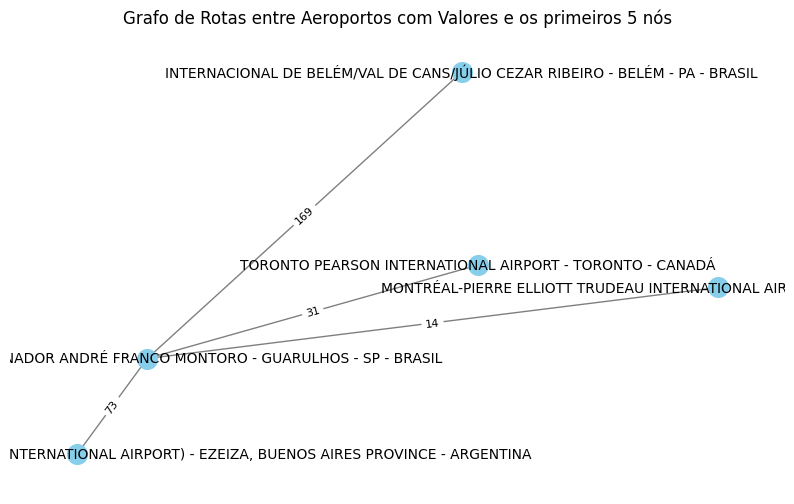

In [27]:
plt.figure(figsize=(10, 6))

nx.draw_networkx_edges(subgrafo, pos, width=1.0, alpha=0.5)

nx.draw_networkx_nodes(subgrafo, pos, node_size=200, node_color='skyblue')

edge_labels = nx.get_edge_attributes(subgrafo, 'label')
nx.draw_networkx_edge_labels(subgrafo, pos, edge_labels=edge_labels, font_size=8)

nx.draw_networkx_labels(subgrafo, pos, font_size=10, font_color='black')

plt.title('Grafo de Rotas entre Aeroportos com Valores e os primeiros 5 nós')
plt.axis('off')
plt.show()




> Calculo da centralidade de grau




In [28]:
degree = nx.degree_centrality(G)

df_degree = pd.DataFrame(degree.items(), columns=['Nó', 'Centralidade de Grau'])

df_degree_sorted = df_degree.sort_values(by='Centralidade de Grau', ascending=False)

print("DataFrame da Centralidade de Grau (Ordenado):")
print(df_degree_sorted)

DataFrame da Centralidade de Grau (Ordenado):
                                                    Nó  Centralidade de Grau
85   GUARULHOS - GOVERNADOR ANDRÉ FRANCO MONTORO - ...              0.479070
209                 VIRACOPOS - CAMPINAS - SP - BRASIL              0.400000
193             TANCREDO NEVES - CONFINS - MG - BRASIL              0.251163
84   GUARARAPES - GILBERTO FREYRE - RECIFE - PE - B...              0.223256
163  PRESIDENTE JUSCELINO KUBITSCHEK - BRASÍLIA - D...              0.209302
..                                                 ...                   ...
156              PONTA PORÃ - PONTA PORÃ - MS - BRASIL              0.004651
65    EUGENE F. CORREIRA INTERNATIONAL - OGLE - GUIANA              0.004651
39                       CANELA - CANELA - RS - BRASIL              0.004651
153  PILOTO OSVALDO MARQUES DIAS - ALTA FLORESTA - ...              0.004651
82                   GUANAMBI - GUANAMBI - BA - BRASIL              0.004651

[216 rows x 2 columns]





> boxplot dos valores de centralidade de grau




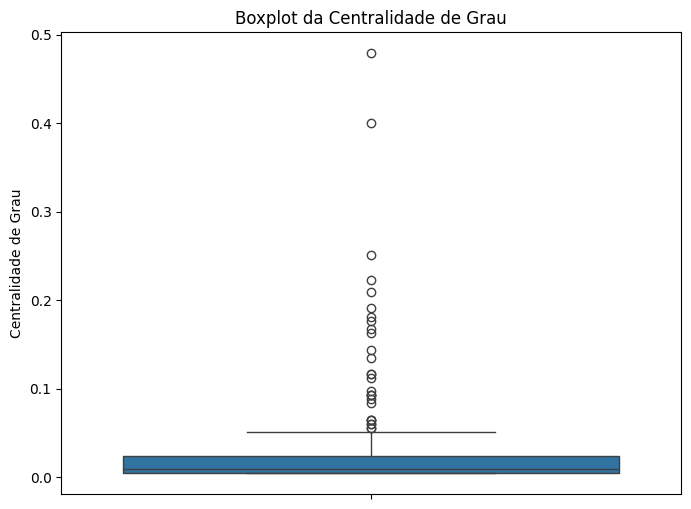

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='Centralidade de Grau', data=df_degree_sorted)
plt.title('Boxplot da Centralidade de Grau')
plt.ylabel('Centralidade de Grau')
plt.show()

In [30]:
print("\nEstatísticas Descritivas:")
print(stats.describe(list(degree.values())))


Estatísticas Descritivas:
DescribeResult(nobs=216, minmax=(0.004651162790697674, 0.4790697674418605), mean=0.02954349698535745, variance=0.0033469515146348637, skewness=4.479127442516925, kurtosis=25.14789029845784)


# **Modelo SIR**

In [31]:
G = nx.from_pandas_edgelist(df, 'origem', 'destino', create_using=nx.DiGraph())

In [32]:
for u, v, d in G.edges(data=True):
    d['weight'] = len(df[(df['origem'] == u) & (df['destino'] == v)])

In [33]:
aeroportos_validos = set(G.nodes())
aeroportos_com_assentos = set(df['origem'])
aeroportos_com_dados = aeroportos_validos.intersection(aeroportos_com_assentos)

In [34]:
N = {aeroporto: total_assentos for aeroporto in aeroportos_com_dados}

In [35]:
N_realista = total_assentos // 100

I0 = {aeroporto: N_realista * 0.01 for aeroporto in aeroportos_com_dados}
S0 = {aeroporto: N[aeroporto] - I0[aeroporto] for aeroporto in aeroportos_com_dados}
R0 = {aeroporto: 0 for aeroporto in aeroportos_com_dados}

In [36]:
beta = 0.3
gamma = 0.5

def modelo_sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [37]:
dias_janeiro = range(1, 32)
t = np.linspace(0, len(dias_janeiro) - 1, len(dias_janeiro))

In [38]:
resultados = {}
for aeroporto in aeroportos_com_dados:
    y0 = S0[aeroporto], I0[aeroporto], R0[aeroporto]
    resultados[aeroporto] = odeint(modelo_sir, y0, t, args=(N_realista, beta, gamma))

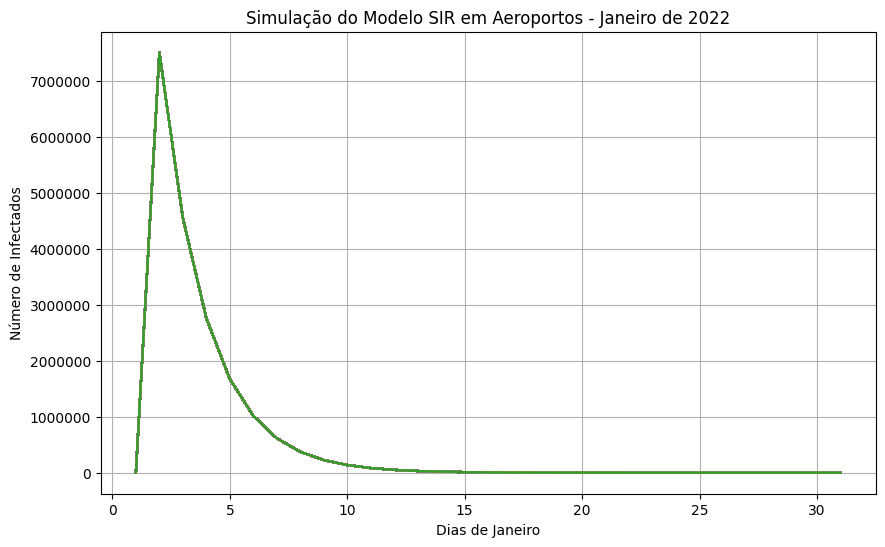

In [39]:
plt.figure(figsize=(10, 6))
for aeroporto, resultado in resultados.items():
    S, I, R = resultado.T
    plt.plot(dias_janeiro, I, label=aeroporto)

plt.xlabel('Dias de Janeiro')
plt.ylabel('Número de Infectados')
plt.title('Simulação do Modelo SIR em Aeroportos - Janeiro de 2022')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

# **Regressão Linear**

In [40]:
no_mais_central = df_degree_sorted.iloc[0]['Nó']

N = df[df['origem'] == no_mais_central]['Número de Assentos'].sum()

I0 = N * 0.01
S0 = N - I0
R0 = 0

In [41]:
dias_fevereiro = np.arange(1, 29)

t_fevereiro = np.linspace(0, len(dias_fevereiro) - 1, len(dias_fevereiro))

In [42]:
y0 = S0, I0, R0
resultado_janeiro = odeint(modelo_sir, y0, t, args=(N, beta, gamma))
S_janeiro, I_janeiro, R_janeiro = resultado_janeiro.T

In [43]:
dias_totais = np.concatenate((dias_janeiro, dias_fevereiro)).reshape(-1, 1)
I_totais = np.concatenate((I_janeiro, np.zeros(len(dias_fevereiro)))).reshape(-1, 1)

In [44]:
modelo = LinearRegression()
modelo.fit(dias_totais, I_totais)
predicao_fevereiro = modelo.predict(dias_fevereiro.reshape(-1, 1))

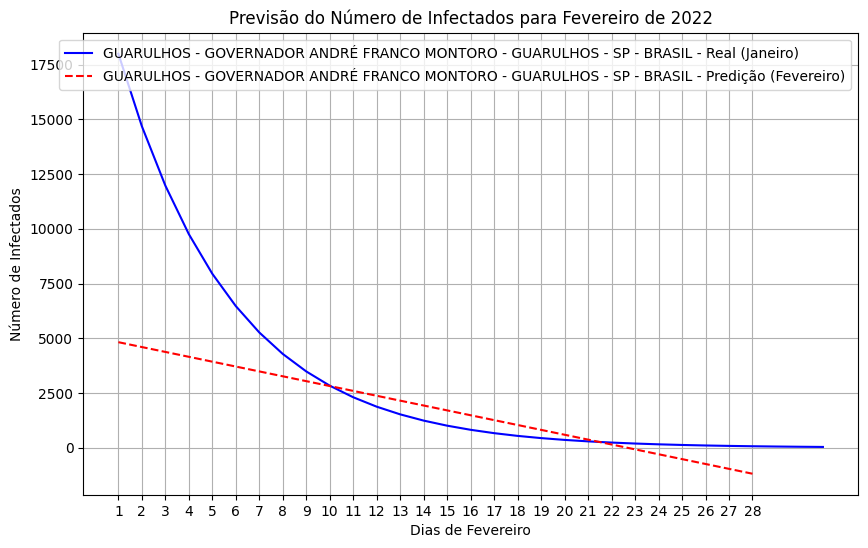

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(dias_janeiro, I_janeiro, label=f'{no_mais_central} - Real (Janeiro)', color='blue')
plt.plot(dias_fevereiro, predicao_fevereiro, label=f'{no_mais_central} - Predição (Fevereiro)', color='red', linestyle='--')

plt.xlabel('Dias de Fevereiro')
plt.ylabel('Número de Infectados')
plt.title('Previsão do Número de Infectados para Fevereiro de 2022')
plt.xticks(np.arange(1, 29, step=1))
plt.legend()
plt.grid(True)
plt.show()